# Compneuro workshop 2021

## Tutorial 1 - Vision with Convolutional Neural Networks
#### Creator: Bahareh Tolooshams

---

## Tutorial objectives 

In this notebook, we learn about visual processing and convolutional neural networks. That is, how neurons response to a particular orientation.


 - Visualize effects of filtering on images.
 - Build a convolutional neural network.
 - Train a convolutional neural network for a classification task.
 - Visualize learned filters and compare them with Gabor filters (edge detector filters).



---
## Imports and helper functions

Please execute the cell below to initialize the notebook environment

In [25]:
# @title
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import matplotlib.pyplot as plt    # import matplotlib plot
import matplotlib.image as matimg  # import matplotlib image


In [101]:
#@title

def vis_images(kernel, img, img_proc, cmap="gray"):
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.imshow(kernel, cmap=cmap)
    plt.title("kernel")
    plt.subplot(132)
    plt.imshow(img_gray, cmap=cmap)
    plt.title("image")
    plt.subplot(133)
    plt.imshow(img_proc, cmap=cmap)
    plt.title("filtered image")
    plt.show()
    return

---
## EXERCISE 1: Create and Apply Blur filter

###1.1. Load and visualize an image 

There are four images in the folder `"data/T1"` (e.g., `"data/T1/1.jpg"`).\
Load an image using the function `imread` from `matplotlib.image`.\
Visualize the image using `imshow` from `matplotlib.pyplot`.

###1.2. Create a function for 2D Gaussian distribution

Use the equation $ G_{2D}(x,y,\sigma) = \frac{1}{2\pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$ to create a function to compute 2D Gaussian distribution.


###1.3. Create a 2D receptive field given a distribution function

`create_receptive_field` is created for this step.

###1.4. Visualize the receptive field matrix

Try various `sigma` and `kernel_size` to see how the kernel changes.

###1.5. Apply the filter on the image

Convert the colored image into a grayscale image by taking the mean of all colors (last dimension) using `np.mean`.\
Filter the grayscale image by the created kernel using the function `sp.signal.convolve2d`.\
The range of image is `(0,255)`. After filtering, map values greater than `255` into `255`, and less than `0` to `0`.

###1.6. Visualize the filtered image along with the filter and original image

Try various `sigma` and `kernel_size` to see the effect of various filters on the image.

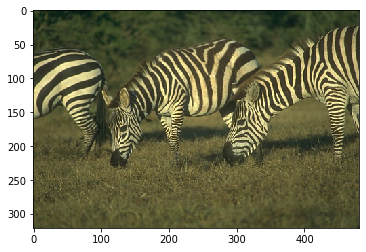

In [94]:
##########################
######## step 1.1. #######
##########################
# load image
img = matimg.imread("data/T1/1.jpg")

# visualize image
plt.imshow(img)
plt.show()

In [95]:
##########################
######## step 1.2. #######
##########################

# create Gaussian 2D function
def G2D(x, y, sigma=1):
    return (1.0 / (2 * np.pi * (sigma**2))) * np.exp(-(1.0 / (2 * (sigma**2))) * (x**2 + y**2))

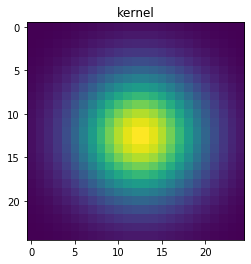

In [99]:
##########################
######## step 1.3. #######
##########################

# create receptive field
def create_receptive_field(func, kernel_size=10):
    receptive_field = np.zeros((kernel_size,kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i-kernel_size/2
            y = j-kernel_size/2
            receptive_field[i, j] = func(x, y);
    return receptive_field

sigma = 5
kernel_size = 25
filterFunc = lambda x,y:G2D(x,y,sigma)
kernel = create_receptive_field(filterFunc, kernel_size)

##########################
######## step 1.4. #######
##########################

# visualize the receptive field
plt.imshow(kernel)
plt.title("kernel")
plt.show()

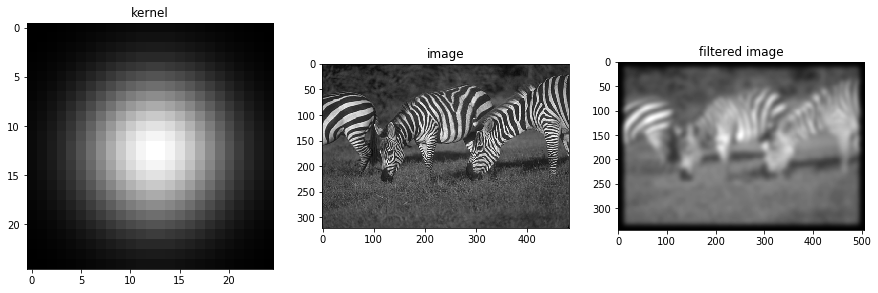

In [102]:
##########################
######## step 1.5. #######
##########################

# convert the colored image into grayscale
img_gray = np.mean(img, axis=-1)

# perform convolution of img_gray * kernel.
img_proc = sp.signal.convolve2d(img_gray, kernel)
img_proc[img_proc>255] = 255
img_proc[img_proc<0] = 0

vis_images(kernel, img_gray, img_proc, cmap="gray")

---
## EXERCISE 2: Repeat Exercise 1 and create the filter using mixture of Gaussian kernels.

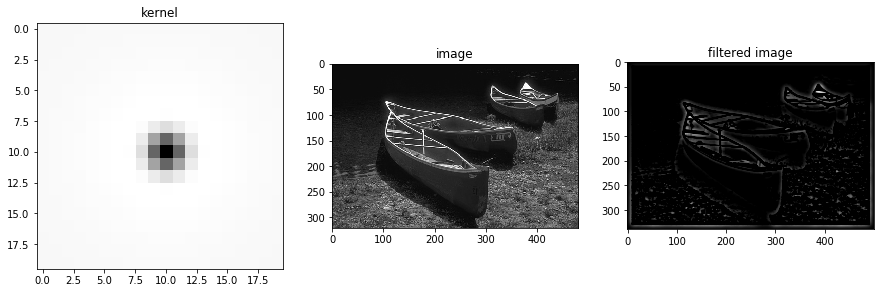

In [121]:
# load image
img = matimg.imread("data/T1/3.jpg")

# create difference of Gaussian filters
def diffG2D(sigma1=1, sigma2=5):
    return lambda x,y:G2D(x,y,sigma1) - G2D(x,y,sigma2)

# create receptive field
sigma1 = 5
sigma2 = 1
kernel_size = 20
filterFunc = diffG2D(sigma1, sigma2)
kernel = create_receptive_field(filterFunc, kernel_size)

# convert the colored image into grayscale
img_gray = np.mean(img, axis=-1)

# perform convolution of img_gray * kernel.
img_proc = sp.signal.convolve2d(img_gray, kernel)
img_proc[img_proc>255] = 255
img_proc[img_proc<0] = 0

# visualize
vis_images(kernel, img_gray, img_proc, cmap="gray")

---
## EXERCISE 3: Repeat Exercise 1 and replace blur kernel with Gabor filters.


Create Gabor filters.\

- Try various `theta` to see how the kernel changes and its effect on the image.
- Try various `kernel_size` or `sigma` and filter the image.

You should now have inuition on how Gabor filters are edge detectors.

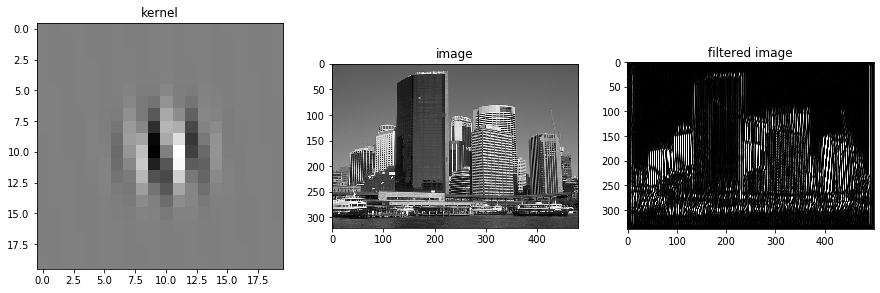

In [137]:
# load image
img = matimg.imread("data/T1/2.jpg")

# create difference of Gaussian filters
def Gabor(x, y, sigma, theta, f):
    return np.exp(-(x**2 + y**2)/(2 * sigma**2)) * np.sin(2 * np.pi * f * (x * np.cos(theta)+ y * np.sin(theta)))

# create receptive field
sigma = 2
theta = np.pi/10
f = 1
kernel_size = 20
filterFunc = lambda x,y:Gabor(x, y, sigma, theta, f)
kernel = create_receptive_field(filterFunc, kernel_size)

# convert the colored image into grayscale
img_gray = np.mean(img, axis=-1)

# perform convolution of img_gray * kernel.
img_proc = sp.signal.convolve2d(img_gray, kernel)
img_proc[img_proc>255] = 255
img_proc[img_proc<0] = 0

vis_images(kernel, img, img_proc, cmap="gray")

---
## Wrap-up

In this notebook, we learn about a convolutional generative model and how we can learn the parameters of the model through a particular recurrent neural network called CRsAE. We learned how to build and train CRsAE. We visualized the weights (filters). For our specific problem, the filters were corresponding to the shape of action potentials each neuron exhibits. At last, We applied CRsAE to Harris dataset and performed spike sorting.